In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from scipy.io import loadmat

from src.data import generate_data, discretize_dataset
from src.feature_selection import CMIM, JMIM, IGFS, wrapper_criterion, l1_selection, find_relevant_features, evaluate_feature_selection, perform_feature_selection_on_all_datasets
from src.visualization import plot_results, plot_multiple_plots

In [2]:
X, y = generate_data(
    betas=[6, 5, 4, 3, 2, 1],
    dataset_variant=2
)
X_discr = np.copy(X)
for i in range(X.shape[1]):
    X_discr[:, i] = pd.cut(X[:, i], bins=10, labels=False)

In [3]:
best_predictors = wrapper_criterion(X, y, 'aic')
best_predictors

[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 14]

In [4]:
best_predictors = wrapper_criterion(X, y, 'bic')
best_predictors

[0, 1, 2, 3, 4, 5, 6, 8, 11, 13]

In [5]:
best_predictors = CMIM(X_discr, y)
best_predictors

[0, 1, 2, 3, 5]

In [6]:
best_predictors = JMIM(X_discr, y)
best_predictors

[0, 1, 2, 6, 9]

In [7]:
best_predictors = IGFS(X_discr, y)
best_predictors

[0, 1, 2, 5, 6]

In [8]:
data = {}

# Divorce dataset, source https://www.kaggle.com/datasets/rabieelkharoua/split-or-stay-divorce-predictor-dataset
# divorce = pd.read_csv("data/divorce.csv", sep=";")

# data["divorce"] = {}
# data["divorce"]["X_orig"] = divorce.drop("Class", axis=1).to_numpy()
# data["divorce"]["X_discr"] = divorce.drop("Class", axis=1).to_numpy()
# data["divorce"]["y"] = divorce["Class"].to_numpy()


# AIDS classification dataset, source: https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction
aids = pd.read_csv("data/aids.csv")
X_aids = aids.drop("infected", axis=1).to_numpy()

data["aids"] = {}
data["aids"]["X_orig"] = X_aids
data["aids"]["X_discr"] = discretize_dataset(X_aids)
data["aids"]["y"] = aids["infected"].to_numpy()


# LOL Diamond FF15 dataset, source: https://www.kaggle.com/datasets/jakejoeanderson/league-of-legends-diamond-matches-ff15
lol = pd.read_csv("data/lol.csv")
X_lol = lol.drop(["match_id", "blue_Win"], axis=1).to_numpy()

data["lol"] = {}
data["lol"]["X_orig"] = X_lol
data["lol"]["X_discr"] = discretize_dataset(X_lol)
data["lol"]["y"] = lol["blue_Win"].to_numpy()


# Cancer dataset, source: https://www.kaggle.com/datasets/erdemtaha/cancer-data
cancer = pd.read_csv("data/cancer.csv")
cancer.loc[cancer["diagnosis"] == "M", "diagnosis"] = 0
cancer.loc[cancer["diagnosis"] == "B", "diagnosis"] = 1
X_cancer = cancer.drop(["id", "diagnosis", "Unnamed: 32"], axis=1).to_numpy()

data["cancer"] = {}
data["cancer"]["X_orig"] = X_cancer
data["cancer"]["X_discr"] = discretize_dataset(X_cancer)
data["cancer"]["y"] = cancer["diagnosis"].to_numpy().astype(int)

# Gait classification, source: https://archive.ics.uci.edu/dataset/604/gait+classification
# gait = loadmat("data/gait.mat")

# X_gait = gait["X"]
# y_gait = gait["Y"].T[0]

# inds_to_del = []
# for i in range(X_gait.shape[0]):
#     if np.sum(np.isnan(X_gait[i, :])) != 0:
#         inds_to_del.append(i)
# X_gait = np.delete(X_gait, (inds_to_del), axis=0)
# y_gait = np.delete(y_gait, (inds_to_del), axis=0)

# data["gait"] = {}
# data["gait"]["X_orig"] = X_gait
# data["gait"]["X_discr"] = discretize_dataset(X_gait)
# data["gait"]["y"] = pd.cut(y_gait, 3, labels=False)

# Generated data
X_gen, y_gen = generate_data(
    betas=[0, 1, 1, 1, 1, 1],
    dataset_variant=0,
    n_classes=2,
)

data["generated"] = {}
data["generated"]["X_orig"] = X_gen
data["generated"]["X_discr"] = discretize_dataset(X_gen)
data["generated"]["y"] = y_gen

Finding relevant features for aids dataset...
Calculations completed!
Finding relevant features for lol dataset...
Calculations completed!
Finding relevant features for cancer dataset...
Calculations completed!
Finding relevant features for generated dataset...
Calculations completed!


Processing dataset generated: 100%|██████████| 6/6 [00:00<00:00, 52.78it/s]


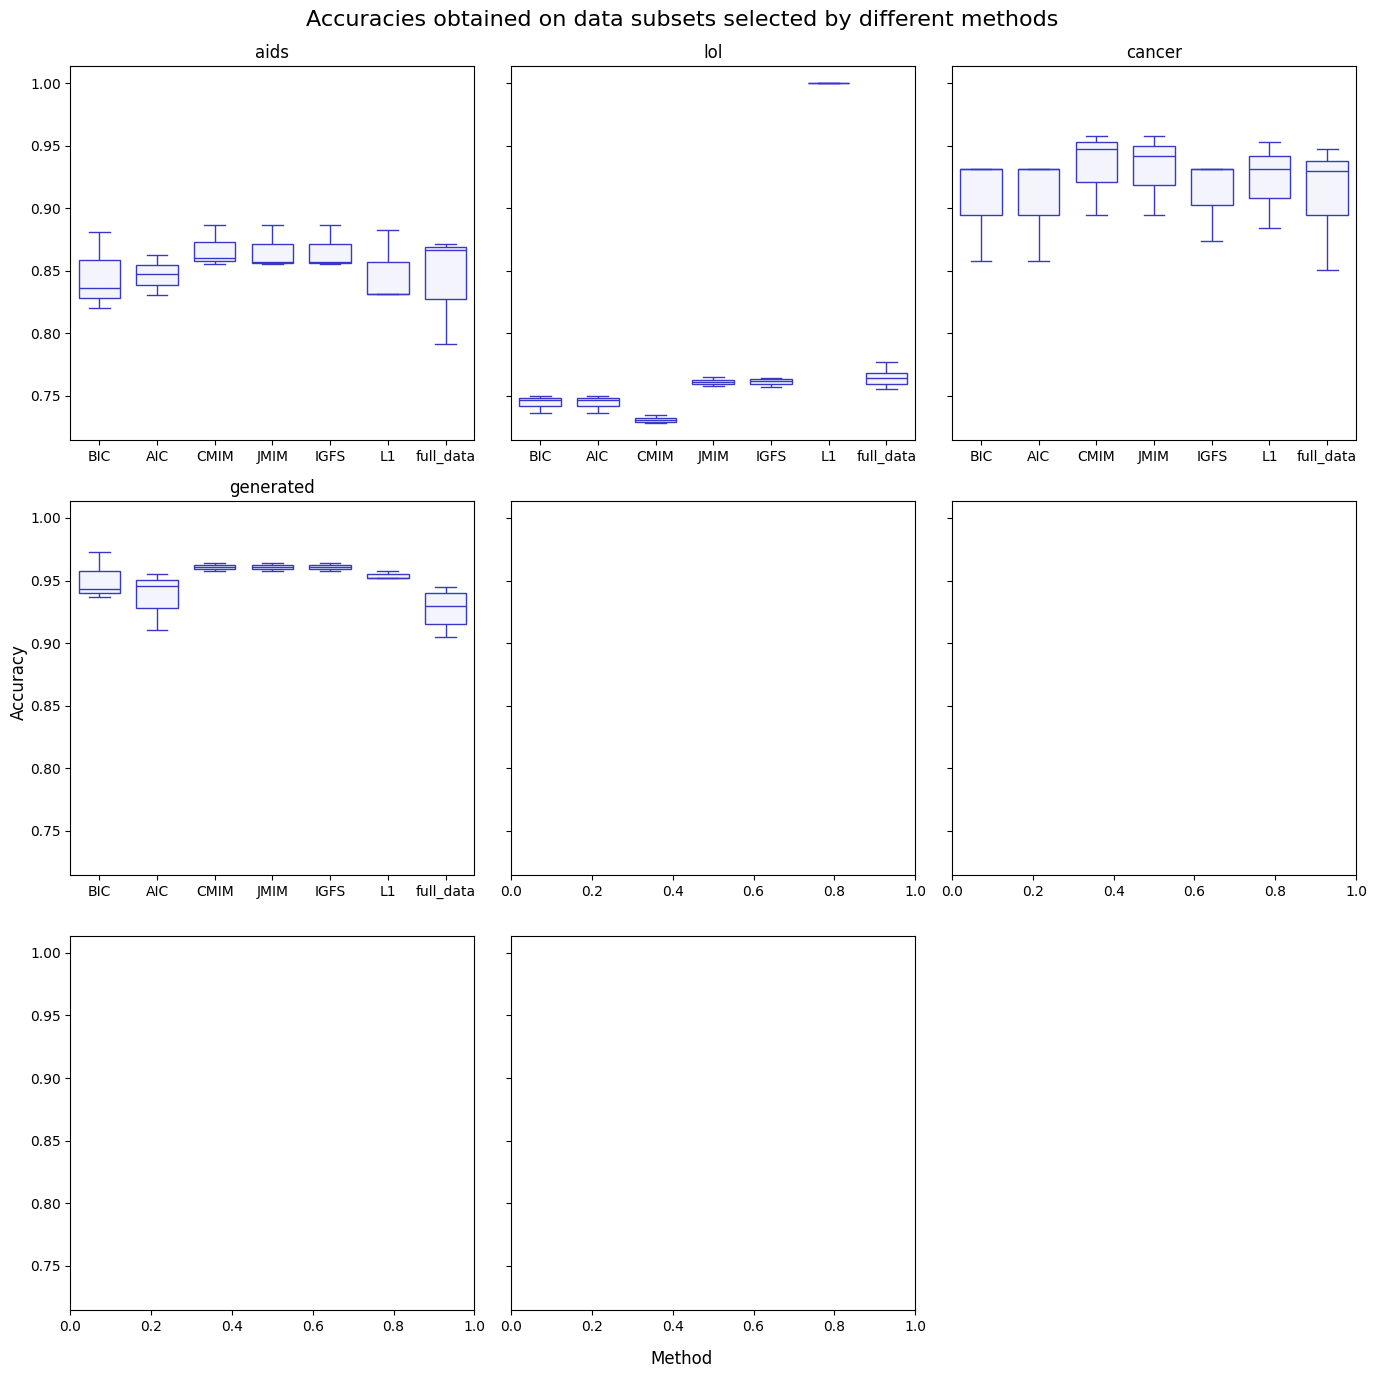

In [9]:
relevant_features = perform_feature_selection_on_all_datasets(data)
accuracy_scores = evaluate_feature_selection(data, relevant_features, SVC)
plot_multiple_plots(accuracy_scores)